In [23]:
import matplotlib.pyplot as plt

In [1]:
import numpy as np

In [303]:
data2 = np.genfromtxt('MultiVarLR (1).csv',delimiter=',')

In [304]:
data2

array([[ 73.,  80.,  75., 152.],
       [ 93.,  88.,  93., 185.],
       [ 89.,  91.,  90., 180.],
       [ 96.,  98., 100., 196.],
       [ 73.,  66.,  70., 142.],
       [ 53.,  46.,  55., 101.],
       [ 69.,  74.,  77., 149.],
       [ 47.,  56.,  60., 115.],
       [ 87.,  79.,  90., 175.],
       [ 79.,  70.,  88., 164.],
       [ 69.,  70.,  73., 141.],
       [ 70.,  65.,  74., 141.],
       [ 93.,  95.,  91., 184.],
       [ 79.,  80.,  73., 152.],
       [ 70.,  73.,  78., 148.],
       [ 93.,  89.,  96., 192.],
       [ 78.,  75.,  68., 147.],
       [ 81.,  90.,  93., 183.],
       [ 88.,  92.,  86., 177.],
       [ 78.,  83.,  77., 159.],
       [ 82.,  86.,  90., 177.],
       [ 86.,  82.,  89., 175.],
       [ 78.,  83.,  85., 175.],
       [ 76.,  83.,  71., 149.],
       [ 96.,  93.,  95., 192.]])

In [7]:
#np.random.shuffle(data2)

In [305]:
y = data2[:,3]
y = y.reshape(25,1)

In [306]:
y

array([[152.],
       [185.],
       [180.],
       [196.],
       [142.],
       [101.],
       [149.],
       [115.],
       [175.],
       [164.],
       [141.],
       [141.],
       [184.],
       [152.],
       [148.],
       [192.],
       [147.],
       [183.],
       [177.],
       [159.],
       [177.],
       [175.],
       [175.],
       [149.],
       [192.]])

In [307]:
M = data2.shape[0]
print(M)
x = np.ones((M,4))
x[:,1:] = data2[:,0:3]
x

25


array([[  1.,  73.,  80.,  75.],
       [  1.,  93.,  88.,  93.],
       [  1.,  89.,  91.,  90.],
       [  1.,  96.,  98., 100.],
       [  1.,  73.,  66.,  70.],
       [  1.,  53.,  46.,  55.],
       [  1.,  69.,  74.,  77.],
       [  1.,  47.,  56.,  60.],
       [  1.,  87.,  79.,  90.],
       [  1.,  79.,  70.,  88.],
       [  1.,  69.,  70.,  73.],
       [  1.,  70.,  65.,  74.],
       [  1.,  93.,  95.,  91.],
       [  1.,  79.,  80.,  73.],
       [  1.,  70.,  73.,  78.],
       [  1.,  93.,  89.,  96.],
       [  1.,  78.,  75.,  68.],
       [  1.,  81.,  90.,  93.],
       [  1.,  88.,  92.,  86.],
       [  1.,  78.,  83.,  77.],
       [  1.,  82.,  86.,  90.],
       [  1.,  86.,  82.,  89.],
       [  1.,  78.,  83.,  85.],
       [  1.,  76.,  83.,  71.],
       [  1.,  96.,  93.,  95.]])

# Task 1:
## Implement the Adam (Batch Version) algorithm to train a multivariable linear regression model.


### Please fulfil the following requirements:
<br>
<b>
    
    1. Check your implementation on the data in the attached file.
    2. You must obtain r2-score > 0.9.
    3. You must plot the following curves.
        - Loss vs. iterations.
        - Loss vs. each parameter (i.e. loss vs theta 0, loss vs. theta 1 .... etc.).
    4. Choose hyper parameters to obtain the required accuracy.
    5. The implementation must be vectoried and calculations must be performed as matrix vector 
    multiplications.
    6. Apply the stop conditions (gradient < 0.001 and cost convergence check).                                            
</b>

In [308]:
def Adam_Batch_multiGD(X,y,alpha,iter_max,epsil,beta1,beta2):
    theta = np.zeros((X.shape[1],1))
    ep = 0
    v = np.zeros((X.shape[1],1))
    M = np.zeros((X.shape[1],1))
    m = X.shape[0]
    for i in range(1,iter_max):
        y_pred = []
        yhat = X @ theta

        e = yhat - y


        j = (e.T @ e) / (2*m)

        d_theta = X.T @ e
        d_t = d_theta / m

        v = (beta2 * v) + ((1 - beta2)*(d_t**2))
        M = (beta1 * M) + ((1 - beta1)* d_t)

       

        theta = theta - (alpha/(np.sqrt(v/(1-beta2**i))+epsil))*(M/((1-beta1**i)))
        

        for num in yhat:
            y_pred.append(num)

        
        loss.append(j[0])   
        Grad_norm = np.linalg.norm(d_t)
        lines.append(y_pred)
        th.append(theta)
       
            
            
        ep += 1
        print(f'****************** Epoch{ep}**************************')
        print("\nCost= ",loss[-1])
        print("\nGradient Norm = ",Grad_norm)
        print(f"\nGrad_vector: \n{d_t}")
        print("theta_new= \n",th[-1])
            
        if i != 1 and (Grad_norm < 0.001 or abs(loss[-1] - loss[-2]) < 0.001):
            break

In [309]:
th = []
loss = []
lines = []

alpha = 0.08
iter_max = 5000
epsil=1e-08
b1=0.9
b2=0.99
Adam_Batch_multiGD(x,y, alpha,iter_max,epsil,b1,b2)

****************** Epoch1**************************

Cost=  [13405.98]

Gradient Norm =  22917.545989219703

Grad_vector: 
[[  -162.04]
 [-13075.8 ]
 [-13147.2 ]
 [-13467.08]]
theta_new= 
 [[0.08]
 [0.08]
 [0.08]
 [0.08]]
****************** Epoch2**************************

Cost=  [10407.446112]

Gradient Norm =  20191.244018768244

Grad_vector: 
[[  -142.76  ]
 [-11519.7936]
 [-11582.6272]
 [-11866.0464]]
theta_new= 
 [[0.15959983]
 [0.15959975]
 [0.15959973]
 [0.15960032]]
****************** Epoch3**************************

Cost=  [7800.33840951]

Gradient Norm =  17478.575783630582

Grad_vector: 
[[  -123.57641495]
 [ -9971.56844513]
 [-10025.87848685]
 [-10273.0192059 ]]
theta_new= 
 [[0.23843991]
 [0.23843959]
 [0.23843948]
 [0.23844192]]
****************** Epoch4**************************

Cost=  [5588.23788005]

Gradient Norm =  14791.791746122999

Grad_vector: 
[[ -104.57587784]
 [-8438.11632208]
 [-8483.98414305]
 [-8695.19251897]]
theta_new= 
 [[0.31607184]
 [0.31607097]
 [0

In [310]:
th0 = [x[0] for x in th]
th1 = [x[1] for x in th]
th2 = [x[2] for x in th]
th3 = [x[3] for x in th]

In [311]:
from sklearn.metrics import r2_score
r2_score(y,lines[-1])

0.9789383166446821

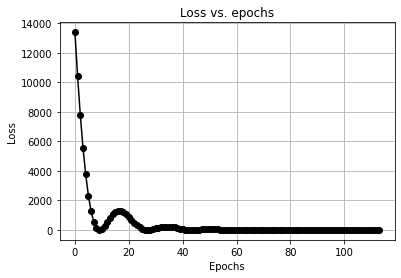

In [312]:
def lossVsepochs(loss):
    plt.plot(loss,'o-',color = "black")
    plt.title("Loss vs. epochs")
    plt.ylabel("Loss")
    plt.xlabel("Epochs")
    plt.grid()
lossVsepochs(loss)

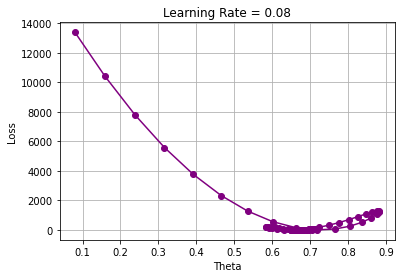

In [313]:
def lossVStheta(theta0,loss,a):
    plt.plot(th0,loss,'o-',color = 'purple')
    plt.title(f"Learning Rate = {a}")
    plt.ylabel("Loss")
    plt.xlabel("Theta")
    plt.grid()
    
lossVStheta(th0,loss,alpha)

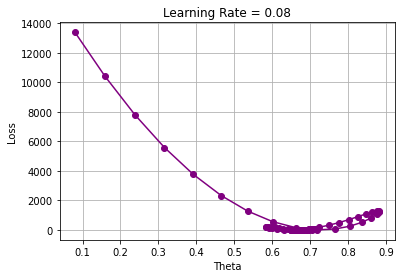

In [314]:
lossVStheta(th1,loss,alpha)

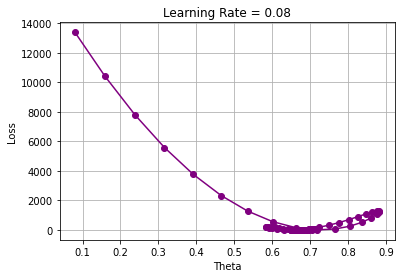

In [315]:
lossVStheta(th2,loss,alpha)

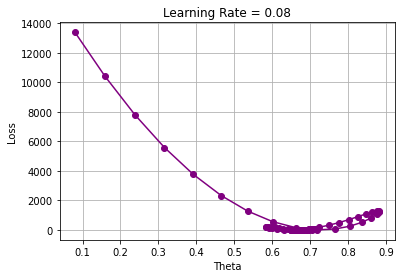

In [316]:
lossVStheta(th3,loss,alpha)

# Task 2
## Repeat task 1 using BFGS optimizer instead of Adam.
### All the requirments stated in task 1 must be also fulfilled in task 2.
### Compare the results from task 1 and task 2 and write your conclusion. 

<font color='red'><b><b><i>Notes:</i></b></font>
    
<font color='red'><b><b><i>You are allowed to use the code you developed during practical sessions. However, it should be your own code.</i></b></font>

<font color='red'><b><i>Any copied code from the internet will be considered as cheeeting</i></b></i></b></font>

<font color='red'><b><i>Any code exchange between trainees will be considered as cheeeting</i></b></font>

In [317]:
def BFGS_Batch_multiGD(X,Y,alpha,iter_max):
    theta = np.zeros((X.shape[1],1))
    theta_k1 = np.ones((X.shape[1],1))
    ep = 0
    B0 = np.identity(4)
    m = X.shape[0]
    for i in range(1,iter_max):
        y_pred = []
        
        yhat = X @ theta
        
        yhat_k1 = X @ theta_k1
        
        e = yhat - Y
    
        
        e_k = yhat_k1 - Y
        
        j = (e.T @ e) / (2*m)
        jk = (e_k.T @ e_k) / (2*m)
        
        d_theta = (X.T @ e)/m
        d_theta_k = (X.T @ e_k)/m

        dx = theta - theta_k1
        y = d_theta - d_theta_k
        theta_k1 = theta
        

        a = np.identity(4) - (np.matmul(dx,y.T)/(y.T @ dx))
        b = a @ B0
        c = b @ (np.identity(4) - (np.matmul(y,dx.T) /(y.T @ dx)))
        B0 = c + (np.matmul(dx,dx.T) /(y.T @ dx))

        theta = theta - alpha * (B0 @ d_theta)

        


        for num in yhat:
            y_pred.append(num)

        
        loss_.append(j[0]) 
        #loss_.append(jk[0])
        
        Grad_norm = np.linalg.norm(d_theta)
        lines_.append(y_pred)
        th_.append(theta)
       
            
            
        ep += 1
        print(f'****************** Epoch{ep}**************************')
        print('B0= \n',B0)
        print("\nCost= ",loss_[-1])
        print("\nGradient Norm = ",Grad_norm)
        print(f"\nGrad_vector: \n{d_theta}")
        print("theta_new= \n",th_[-1])
            
        if i != 1 and (Grad_norm < 0.001 or abs(loss_[-1] - loss_[-2]) < 0.001):
            break

In [318]:
th_ = []
loss_ = []
lines_ = []

alpha = 0.08
iter_max = 5000

BFGS_Batch_multiGD(x,y, alpha,iter_max)

****************** Epoch1**************************
B0= 
 [[ 1.32257848 -0.00156435 -0.00337127 -0.01106197]
 [-0.00156435  0.67429282 -0.32751409 -0.3352048 ]
 [-0.00337127 -0.32751409  0.67067899 -0.33701171]
 [-0.01106197 -0.3352048  -0.33701171  0.65529758]]

Cost=  [13405.98]

Gradient Norm =  22917.545989219703

Grad_vector: 
[[  -162.04]
 [-13075.8 ]
 [-13147.2 ]
 [-13467.08]]
theta_new= 
 [[ 0.04482919]
 [-0.27668148]
 [-0.32543947]
 [ 0.745694  ]]
****************** Epoch2**************************
B0= 
 [[ 1.32258160e+00 -6.39158916e-04 -1.14079482e-03 -1.41043328e-02]
 [-6.39158916e-04  6.62753747e-01 -3.48136433e-01 -3.00717973e-01]
 [-1.14079482e-03 -3.48136433e-01  6.38130351e-01 -2.77447317e-01]
 [-1.41043328e-02 -3.00717973e-01 -2.77447317e-01  5.53221278e-01]]

Cost=  [11346.09123544]

Gradient Norm =  21084.00893348011

Grad_vector: 
[[  -148.97085652]
 [-12033.77258775]
 [-12104.93717263]
 [-12376.26978309]]
theta_new= 
 [[ 0.12213661]
 [ 2.87501832]
 [ 7.77058894]
 

In [319]:
th0_ = [x[0] for x in th_]
th1_ = [x[1] for x in th_]
th2_ = [x[2] for x in th_]
th3_ = [x[3] for x in th_]

In [320]:
r2_score(y,lines_[-1])

0.9896317883933043

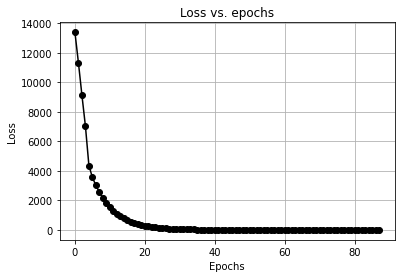

In [321]:
lossVsepochs(loss_)

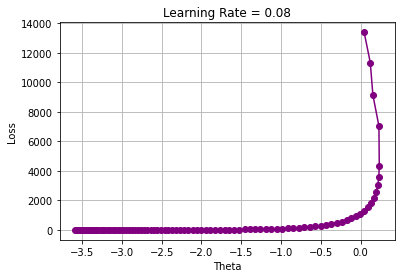

In [322]:
plt.plot(th0_,loss_,'o-',color = 'purple')
plt.title(f"Learning Rate = {0.08}")
plt.ylabel("Loss")
plt.xlabel("Theta")
plt.grid()

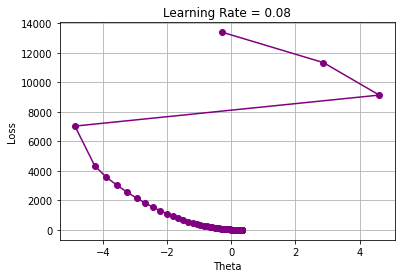

In [323]:
plt.plot(th1_,loss_,'o-',color = 'purple')
plt.title(f"Learning Rate = {0.08}")
plt.ylabel("Loss")
plt.xlabel("Theta")
plt.grid()

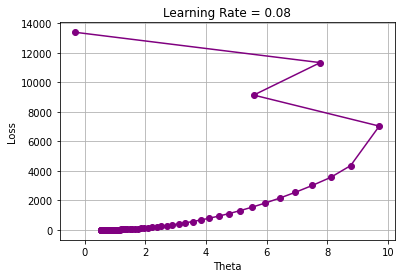

In [324]:
plt.plot(th2_,loss_,'o-',color = 'purple')
plt.title(f"Learning Rate = {0.08}")
plt.ylabel("Loss")
plt.xlabel("Theta")
plt.grid()

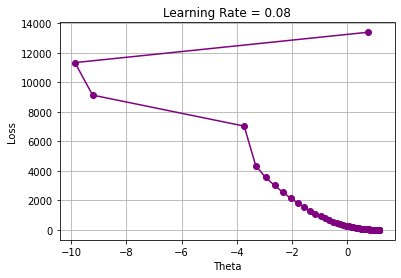

In [325]:
plt.plot(th3_,loss_,'o-',color = 'purple')
plt.title(f"Learning Rate = {0.08}")
plt.ylabel("Loss")
plt.xlabel("Theta")
plt.grid()

## Compare &Concolusion

### I use the same data and the same alpha in two methods, and I found that:
### 1- Adam takes 114 epochs(iteration)  with 97.8 % accuracy.
### 2- BFGS takes only 88 epochs( iterations) with higher accuracy 98.9%
### that is becacuse Adam is a first order operation so it's slower, and GBFS is a second order operation so it's faster, and the cost function I used is a convex function so the second order is more suitable.

## I will redo the same above but I will choose the another alpha for each method

In [326]:
th = []
loss = []
lines = []

alpha = 0.8
iter_max = 5000
epsil=1e-08
b1=0.9
b2=0.999
Adam_Batch_multiGD(x,y, alpha,iter_max,epsil,b1,b2)

****************** Epoch1**************************

Cost=  [13405.98]

Gradient Norm =  22917.545989219703

Grad_vector: 
[[  -162.04]
 [-13075.8 ]
 [-13147.2 ]
 [-13467.08]]
theta_new= 
 [[0.8]
 [0.8]
 [0.8]
 [0.8]]
****************** Epoch2**************************

Cost=  [487.85519999]

Gradient Norm =  4345.49272780178

Grad_vector: 
[[  30.76      ]
 [2484.26399998]
 [2498.52799998]
 [2543.25599998]]
theta_new= 
 [[1.21555425]
 [1.21544858]
 [1.21541342]
 [1.21620219]]
****************** Epoch3**************************

Cost=  [8749.30955904]

Gradient Norm =  18511.755337866838

Grad_vector: 
[[  130.94182342]
 [10569.5016429 ]
 [10628.27387217]
 [10862.47529097]]
theta_new= 
 [[1.14908609]
 [1.14883751]
 [1.14875485]
 [1.15061279]]
****************** Epoch4**************************

Cost=  [6745.80423482]

Gradient Norm =  16252.975574297325

Grad_vector: 
[[ 114.96816856]
 [9280.32380751]
 [9331.99315055]
 [9536.01023514]]
theta_new= 
 [[0.87835107]
 [0.87796968]
 [0.87784

In [327]:
r2_score(y,lines[-1])

0.9845388705659257

In [328]:
th0 = [x[0] for x in th]
th1 = [x[1] for x in th]
th2 = [x[2] for x in th]
th3 = [x[3] for x in th]

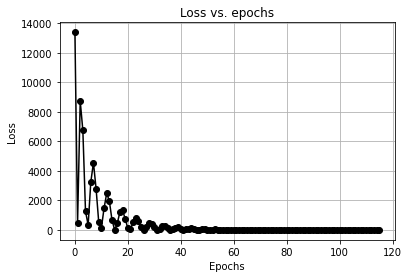

In [329]:
lossVsepochs(loss)

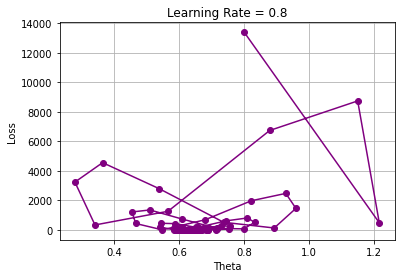

In [330]:
lossVStheta(th0,loss,alpha)

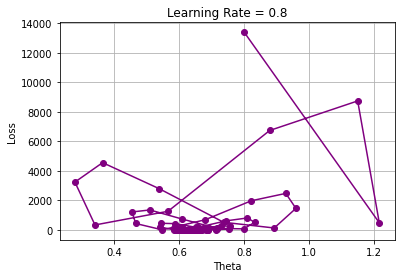

In [331]:
lossVStheta(th1,loss,alpha)

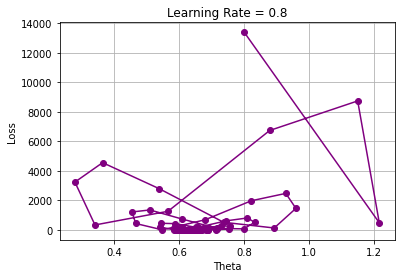

In [332]:
lossVStheta(th2,loss,alpha)

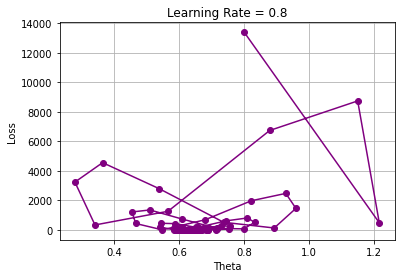

In [333]:
lossVStheta(th2,loss,alpha)

In [334]:
th_ = []
loss_ = []
lines_ = []

alpha = 0.8
iter_max = 5000

BFGS_Batch_multiGD(x,y, alpha,iter_max)

****************** Epoch1**************************
B0= 
 [[ 1.32257848 -0.00156435 -0.00337127 -0.01106197]
 [-0.00156435  0.67429282 -0.32751409 -0.3352048 ]
 [-0.00337127 -0.32751409  0.67067899 -0.33701171]
 [-0.01106197 -0.3352048  -0.33701171  0.65529758]]

Cost=  [13405.98]

Gradient Norm =  22917.545989219703

Grad_vector: 
[[  -162.04]
 [-13075.8 ]
 [-13147.2 ]
 [-13467.08]]
theta_new= 
 [[ 0.44829186]
 [-2.76681481]
 [-3.25439467]
 [ 7.45694003]]
****************** Epoch2**************************
B0= 
 [[ 1.32258160e+00 -6.39158916e-04 -1.14079482e-03 -1.41043328e-02]
 [-6.39158916e-04  6.62753747e-01 -3.48136433e-01 -3.00717973e-01]
 [-1.14079482e-03 -3.48136433e-01  6.38130351e-01 -2.77447317e-01]
 [-1.41043328e-02 -3.00717973e-01 -2.77447317e-01  5.53221278e-01]]

Cost=  [1199.2939989]

Gradient Norm =  4585.243619452601

Grad_vector: 
[[  -31.3485652 ]
 [-2655.5258775 ]
 [-2724.57172635]
 [-2558.97783091]]
theta_new= 
 [[   0.89859595]
 [  30.74228988]
 [  80.04905353]
 

In [335]:
r2_score(y,lines_[-1])

0.9896615214965249

In [336]:
th0_ = [x[0] for x in th_]
th1_ = [x[1] for x in th_]
th2_ = [x[2] for x in th_]
th3_ = [x[3] for x in th_]

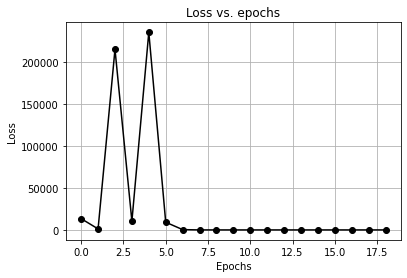

In [337]:
lossVsepochs(loss_)

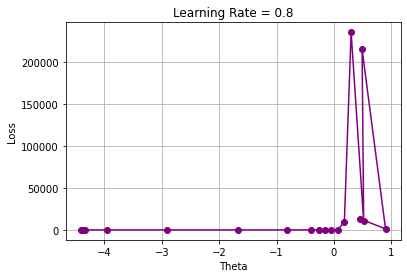

In [338]:
plt.plot(th0_,loss_,'o-',color = 'purple')
plt.title(f"Learning Rate = {0.8}")
plt.ylabel("Loss")
plt.xlabel("Theta")
plt.grid()

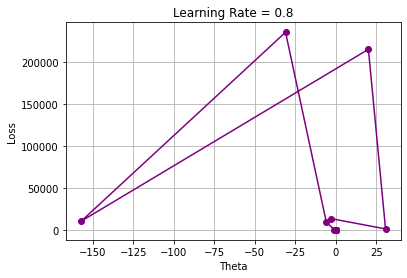

In [339]:
plt.plot(th1_,loss_,'o-',color = 'purple')
plt.title(f"Learning Rate = {0.8}")
plt.ylabel("Loss")
plt.xlabel("Theta")
plt.grid()

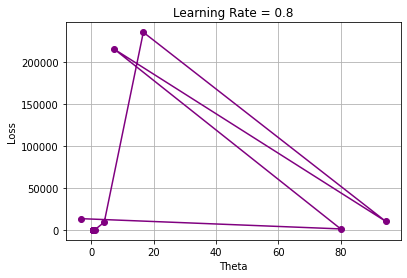

In [340]:
plt.plot(th2_,loss_,'o-',color = 'purple')
plt.title(f"Learning Rate = {0.8}")
plt.ylabel("Loss")
plt.xlabel("Theta")
plt.grid()

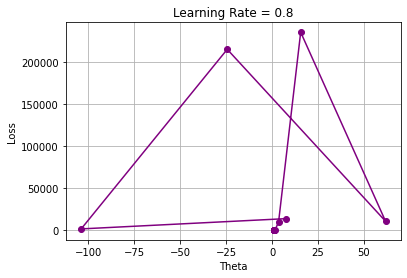

In [341]:
plt.plot(th3_,loss_,'o-',color = 'purple')
plt.title(f"Learning Rate = {0.8}")
plt.ylabel("Loss")
plt.xlabel("Theta")
plt.grid()

# Compare & Concolusion

### I use the same data and the same alpha in two methods, and I found that:
### 1- Adam takes 116 epochs(iteration)  with 98.4 % accuracy.
### 2- BFGS takes only 19 epochs( iterations) with higher accuracy 98.9%
### that is becacuse Adam is a first order operation so it's slower, and GBFS is a second order operation so it's faster, and the cost function I used is a convex function so the second order is more suitable.
### there are oscillations in both but GBFS is better than Adam because it's faster and more accurate.